<a href="https://colab.research.google.com/github/shrutivarade/cs666student/blob/main/Copy_of_CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

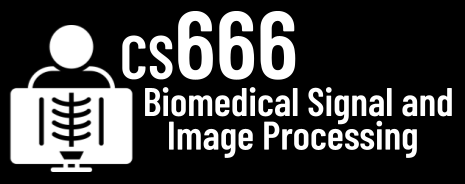
#Assignment 4

In [ ]:
# NAME: Shruti Shailendra Varade


In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [4]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [69]:
# we are using mahotas again, so lets install it!
!pip install mahotas --no-binary :all:

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs666.org/data/xray/
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
#
# TODO: Upload xray.zip using the file panel on the left.

In [72]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [73]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

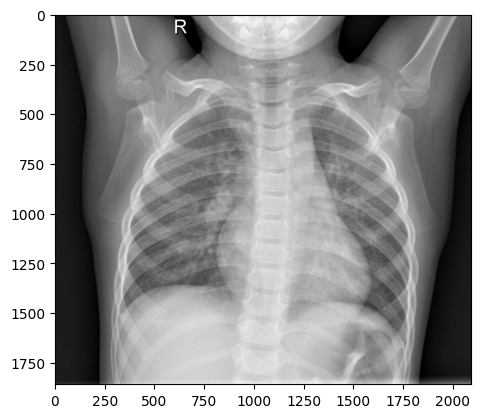

In [74]:
# TODO: YOUR CODE
# Display image 
plt.imshow(img, cmap='gray')

In [75]:
# Print the dimensions of image
height, width = img.shape[:2]
print("Image dimensions:")
print("Height:",height)
print("Width:", width)

Image dimensions:
Height: 1858
Width: 2090


**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [76]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) mh.imread- reading the image file 
# TODO: Operation 2) mh.colors.rgb2gray- converting color image to grayscale image
# TODO: Operation 3) mh.imresize - resizing all images to 300 x 300 pixels

Operation 1) mh.imread- reading the image file 

Operation 2) mh.colors.rgb2gray- converting color image to grayscale image

Operation 3) mh.imresize - resizing all images to 300 x 300 pixels

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
# TODO: YOUR CODE

In [ ]:
# Normal_img = [NORMAL_DIR]
# for f_index,f in enumerate( Normal_img ):
#   all_files = os.listdir( f )
  
#   for i in range(5):
#       image = mh.imread( f + '/' + all_files[i] )
#       if image.ndim > 2:
#         image = mh.colors.rgb2gray(image[:,:,:3])

#       image = mh.imresize( image, (300, 300) )
#       plt.imshow(image, cmap='gray')
#       plt.show()

In [ ]:
# Pneumonia_img = [PNEUMONIA_DIR]
# for f_index,f in enumerate( Pneumonia_img ):
#   all_files = os.listdir( f )
  
#   for i in range(5):
#       image = mh.imread( f + '/' + all_files[i] )
#       if image.ndim > 2:
#         image = mh.colors.rgb2gray(image[:,:,:3])

#       image = mh.imresize( image, (300, 300) )
#       plt.imshow(image, cmap='gray')
#       plt.show()

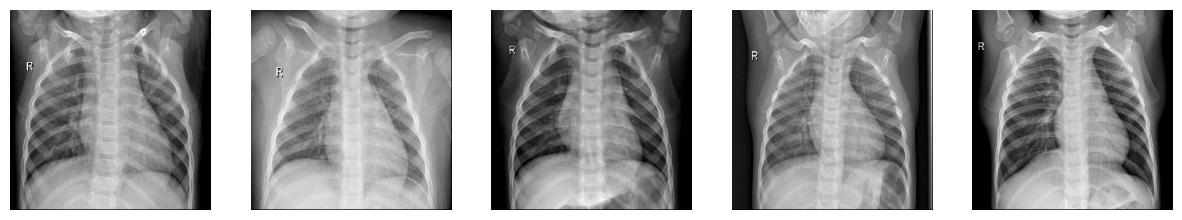

In [110]:
Normal_img = [NORMAL_DIR]
for f_index,f in enumerate(Normal_img):
    all_files = os.listdir(f)
    n_rows = 1
    
    fig, axes = plt.subplots(n_rows, 5, figsize=(15, n_rows*3)) 
    
    for i, ax in enumerate(axes.flat):
        if i < len(all_files):
            image = mh.imread(f + '/' + all_files[i])
            if image.ndim > 2:
                image = mh.colors.rgb2gray(image[:,:,:3])
            image = mh.imresize(image, (300, 300))
            ax.imshow(image, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.show()

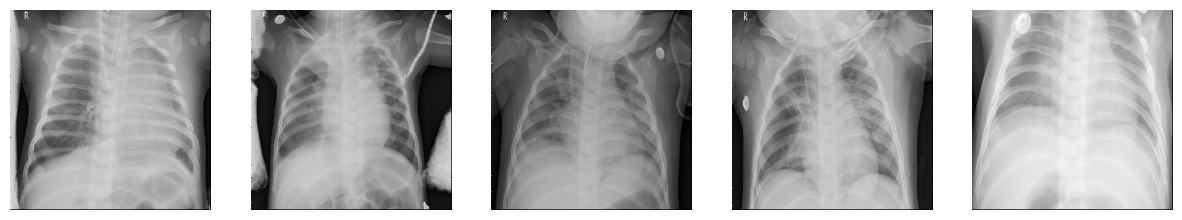

In [111]:
Pneumonia_img = [PNEUMONIA_DIR]
for f_index,f in enumerate(Pneumonia_img):
    all_files = os.listdir(f)
    n_rows = 1
    fig, axes = plt.subplots(n_rows, 5, figsize=(15, n_rows*3)) 
    
    for i, ax in enumerate(axes.flat):
        if i < len(all_files):
            image = mh.imread(f + '/' + all_files[i])
            if image.ndim > 2:
                image = mh.colors.rgb2gray(image[:,:,:3])
            image = mh.imresize(image, (300, 300))
            ax.imshow(image, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.show()

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [81]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [82]:
# TODO: Please create the y_train vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
# y_train = # TODO

y_train = np.zeros( (TRAINING_COUNT * 3), dtype=np.int32)
y_train[0:60] = 0 #0 for a normal image
y_train[60:120] = 1 #1 for a pneumonia image
y_train[120:180] = 2 #2 for a covid image



In [83]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [84]:
# TODO: Please create the y_test vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
# y_test = # TODO

y_test = np.zeros( (TESTING_COUNT * 3), dtype=np.int32)
y_test[0:40] = 0 #0 for a normal image
y_test[40:80] = 1 #1 for a pneumonia image
y_test[80:160] = 2 #2 for a covid image


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [85]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [86]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [89]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [88]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER

Random forest classifier algorithm takes a random dataset of training data and random conditions to create a split at the decision nodes. This approach prevents the prediction to have the overfitting concern and improves model's generalization performance towards the dataset.

In [90]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: YOUR ANSWER

Yes, the accuracy score provided by the model's performance is perfect 1.0, giving us a 100% accurate prediction. It wasn't surprising because the training and testing dataset that we provided was expected to be 100% correct. For both the dataset, the outcome was free from any kind of uncertainty or impurity. Hence, it wasn't surprising to me. 

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [91]:
# TODO: YOUR CODE AND YOUR ANSWER
covid_images_count = 99
X_test_covid_only = np.zeros((covid_images_count, 300*300), dtype=np.float32)
t_pos=0

for d in data[2:]:
  for image in d[100: (100+covid_images_count)]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test_covid_only[t_pos] = image
    t_pos += 1


In [92]:
y_test_covid_only = np.zeros( (covid_images_count), dtype=np.int32)
y_test_covid_only[0:] = 2
y_test_covid_only

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [98]:

predictions = clf.predict(X_test_covid_only)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [94]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

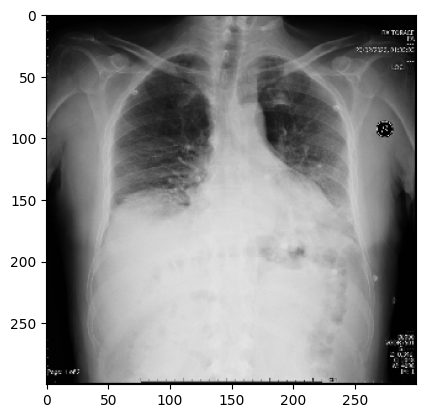

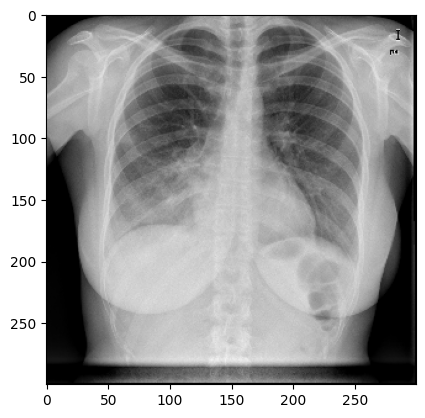

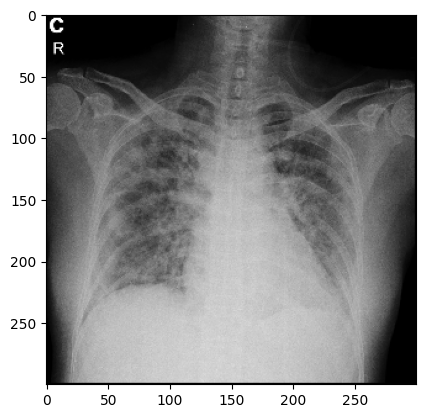

In [99]:
# TODO: YOUR CODE AND YOUR ANSWER
misclassified_img = X_test_covid_only[predictions!=2]
for i in misclassified_img:
    plt.imshow(i.reshape(300,300), cmap='gray')
    plt.show()

The images that are misclassified can have various problems such as not enough training dataset, low quality, damaged pictures or the lights and angles are in strange position that created issues while predicting the outcomes.


In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw